In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
from matplotlib import cm, colors, patches,path,markers,lines
warnings.filterwarnings('ignore')
mk=np.tile(markers.MarkerStyle.filled_markers,3)
listacolor=[cm.get_cmap('gnuplot')(xci) for xci in np.linspace(0,1,100)]
ck = list(colors.cnames)
#Esta sección define las bibliotecas a usar. Numpy módulo de matemática, Matplotlib, de dibujo

$u_s = \int_0^s E(\sigma)\sigma^-{2}d\sigma$

$E(\sigma) = A\epsilon^{2/3}\sigma^{5/3}c_d(\eta/\sigma)c_e(\sigma/R)$

Kolmogorov spectrum valid for inertial range. $c_d$, $c_e$ corrections for dissipative and energetic range:

$c_d(\eta/\sigma) = exp(-\beta\eta/\sigma)$

$c_e(\sigma/R) = [1+\gamma(\sigma/R)^2]^{-17/6}$ proposed by Von Karman

Taylor scaling $\epsilon =\kappa_\epsilon u_R^3/R$

$u_R = \kappa_u V$ ($\kappa_u$ dimensionless constant)

$\eta = bR Re^{-3/4}$ where $b = (\kappa_\epsilon\kappa_u^3)^{-1/4}$

$x \equiv \sigma/R$

$\tau \sim \rho V u_s$  because  $u_n\simeq u_s$ momentum transfer to the wall through roughness
$\tau = \kappa_t \rho V u_s$


In [2]:
def b_fun(k_e,k_u):
    return (k_e*k_u**3)**(-1/4.)
def eta_fun(Re,R,b):
    return b*R*Re**(-3/4.)
def s_R(r_R,a,b,Re):
    return r_R+a*b*Re**(-3/4.)
def c_d(beta,eta_sigma):
    return np.exp(-beta*eta_sigma)
def c_e(sigma_R,gamma):
    return (1+gamma*sigma_R**2)**(-17/6.)
def K_fun(kt,ku):
    return kt*ku*(2/3.)**0.5
def b_fun(ke,ku):
    return (ke*ku**3)**(-1/4.)
def f_fun(K, r_R,a,b,Re,beta,gamma):
    x = np.linspace(1e-8,s_R(r_R,a,b,Re),200)
    f_x=x**(-1/3.)*c_d(beta,b*Re**(-3/4.)/x)*c_e(x,gamma)
    return K*np.trapz(f_x,x)**(0.5)


In [3]:
Re = 10**np.linspace(2.8,10,200) 
a , beta, gamma, ku, ke, kt  =[ 5 , 2.1 ,  6.783 , 0.036 , 5/4. , 0.5 ]
K , b = [K_fun(kt,ku) , b_fun(ke,ku)]
R_r = np.array([15,30.6,60,126,252,507,1014])
r_R = 1/R_r
f , f_no_E, f_no_E_D= np.tile(np.zeros_like(Re),(3,len(r_R),1))

In [4]:

for k,r_Ri in enumerate(r_R):    
    for i,Rei in enumerate(Re):
        f[k,i] = f_fun(K, r_Ri,a,b,Rei,beta,gamma)
        f_no_E[k,i] = f_fun(K, r_Ri,a,b,Rei,beta,0)
        f_no_E_D[k,i] = f_fun(K, r_Ri,a,b,Rei,0,0)

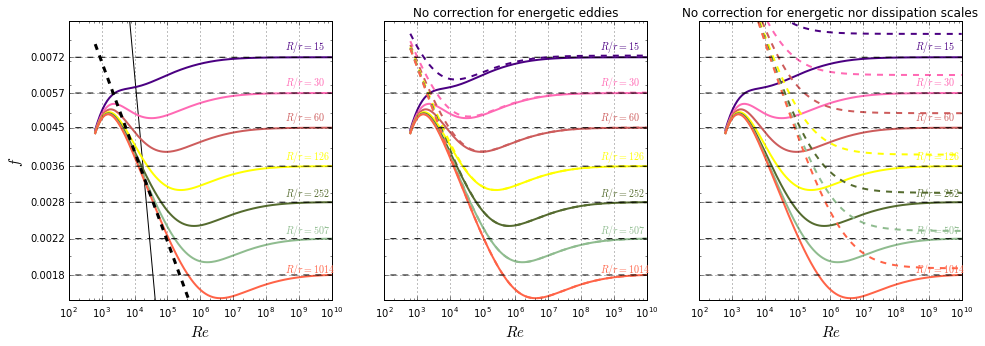

In [5]:
titulos = ['','No correction for energetic eddies','No correction for energetic nor dissipation scales']
fig,ax = plt.subplots(1,3,figsize=(16,5),sharey=True)
#ax.plot(np.log10(Re),3+np.log10(f.T))
ax0,ax1,ax2 = ax
ax0.loglog(Re,64/Re,color='k')
for k,f_i in enumerate(f):    
    ax1.loglog(Re,f_no_E[k],label='$R/r=%0d$'%R_r[k],linewidth=2,color=ck[2*k],linestyle='--')
    ax2.loglog(Re,f_no_E_D[k],label='$R/r=%0d$'%R_r[k],linewidth=2,color=ck[2*k],linestyle='--')
    for axi in ax:
        axi.text(Re[-40],f_i[-40]*1.05,'$R/r=%0d$'%R_r[k],color=ck[2*k])
        axi.loglog(Re,f_i,label='$R/r=%0d$'%R_r[k],linewidth=2,color=ck[2*k])
for j,axi in enumerate(ax):
    axi.set_ylim([0.0015,0.009])
    axi.set_xlim([1e2,1e10])
    axi.set_xlabel('$Re$',fontsize=15)
    axi.grid(which='major')
    axi.plot([1,1e10],f[:,-3:-1].T,linewidth=1,linestyle='--',color='k')
    axi.set_title(titulos[j])
ax0.set_yticks(f[:,-1])    
txt = ax0.set_yticklabels(['%.4f'%fi for fi in  f[:,-1]])
ax0.set_ylabel('$f$',fontsize=15)
#ax0.loglog(Re,8/Re,color='k')
#fig.tight_layout()
#ax.legend(loc='best',ncol=3)
ax0.plot(Re,0.039*Re**(-1/4.),linewidth=3,color='k',linestyle='--');
#ax0.plot(Re,Re*0+0.0179*r_R[2]**(1/3.),linewidth=3,color=ck[2*2],linestyle='--')
#ax0.plot(Re,Re*0+0.0179*r_R[4]**(1/3.),linewidth=3,color=ck[2*4],linestyle='--')